<a href="https://colab.research.google.com/github/SecureGitWire/GoogleCollabeTensorflowDev/blob/main/NeuralNetworkClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Neural Network Classification

* Binary Classification
* Multi Class Classification
* Multi Label Classification

## Create Data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples

n_samples = 1000

# Create circles

x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out features
x[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
# Check out labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

# Visualize Data

In [4]:
import pandas as pd

circles = pd.DataFrame({"X0":x[:, 0], "X1":x[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


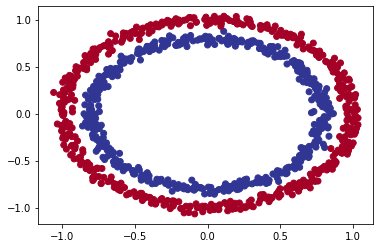

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and Output Shapes

In [6]:
# Check the spaes of our features and labels
x.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working with
len(x), len(y)

(1000, 1000)

In [8]:
# View examples of features and labels
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in modeling

Create Model
Compile Model
Fit Model
Evaluate Model
Tune
Evaluate

In [9]:
import tensorflow as tf

In [10]:
#set the random seed - for reproducability
tf.random.set_seed(42)

# 1. Create a model
classification_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
classification_model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# 3. Fit the model
classification_model_1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 5ms/step - loss: 4.5122 - accuracy: 0.4760
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 3.2919 - accuracy: 0.5200
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7854 - accuracy: 0.4980
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7166 - accuracy: 0.4970
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7012 - accuracy: 0.4960


In [11]:
# Train longer to improve model
classification_model_1.fit(x,y,epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6971 - accuracy: 0.4980
Epoch 2/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6952 - accuracy: 0.4980
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.4660
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4860
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4720
Epoch 6/200
32/32 [==============================] - 0s 8ms/step - loss: 0.6936 - accuracy: 0.5150
Epoch 7/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4770
Epoch 9/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6940 - accuracy: 0.4880
Epoch 10/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.4820
Epoch 11/

In [12]:
classification_model_1.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [13]:
## Improve Model
# Set Random Seed
tf.random.set_seed(42)
# Create Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
# Compile Model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)
# Fit Model
model_2.fit(x,y,epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 6.1183 - accuracy: 0.4750
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 6.5844 - accuracy: 0.4500
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 11/

In [14]:
model_2.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Set Random Seed
# Create Model
# Compile Model
# Fit Model

In [17]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [18]:
model_2.evaluate(x,y)

32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [19]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

In [20]:
# Model is guessing with a 50 percent accuracy and predicting a binary classification problem correctly predicting one compared to two.

## Improve Model

In [21]:
#tf.keras.Input(shape=(2,1,1)),
#tf.keras.Flatten(input_shape=(2,1,1)),
#relu
#softmax

# Set Random Seed
tf.random.set_seed(42)
# Create Model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), #added 100 dense neurons
    tf.keras.layers.Dense(10), #add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])
# Compile Model
model_3.compile(
    loss=tf.keras.losses.BinaryFocalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# Fit Model
model_3.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 1.8983 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5101 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3915 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3240 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2745 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2372 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2109 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1833 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1775 - accuracy: 0.5000
Epoch 11/

In [22]:
model_3.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1744 - accuracy: 0.5030


[0.17443382740020752, 0.503000020980835]

In [23]:
model_3.predict(x)

32/32 [==============================] - 0s 1ms/step


array([[0.47939667],
       [0.5234134 ],
       [0.52525604],
       [0.5154789 ],
       [0.48288015],
       [0.5179222 ],
       [0.5048604 ],
       [0.47846657],
       [0.5013822 ],
       [0.5091318 ],
       [0.51655304],
       [0.48792377],
       [0.5080625 ],
       [0.4771405 ],
       [0.47977802],
       [0.4909619 ],
       [0.52622354],
       [0.49325737],
       [0.5239727 ],
       [0.5155262 ],
       [0.484246  ],
       [0.52124697],
       [0.4960057 ],
       [0.48005882],
       [0.5294424 ],
       [0.5289635 ],
       [0.49692136],
       [0.47533783],
       [0.48906532],
       [0.47871426],
       [0.50510275],
       [0.51200193],
       [0.50411123],
       [0.47091776],
       [0.49765182],
       [0.5270603 ],
       [0.5199924 ],
       [0.4908453 ],
       [0.48891017],
       [0.48173463],
       [0.51405925],
       [0.4944931 ],
       [0.5179812 ],
       [0.4746726 ],
       [0.5219946 ],
       [0.5254217 ],
       [0.4824227 ],
       [0.497

In [24]:
# Visualize Model Predictions -- Create Function -- plot_decision_boundary()

# Take Trained model, features(x) and labels(y)
# Create Mesh Grid
# Make Predictions across mesh grid
# Plot predictions and line between zones where each class falls 1 or 0

# This function was created using two resources
# https://cs231n.github.io/neural-networks-case-study/
# https://github.com/Mahnoor123-Fatima/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb

import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(trained_model,
                           x,
                           y):
  #Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

  #Create Mesh Grid
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D Arrays together

  # Make Predictions
  y_pred = trained_model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Multiclass Classification")
    # Reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Binary Classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
Binary Classification


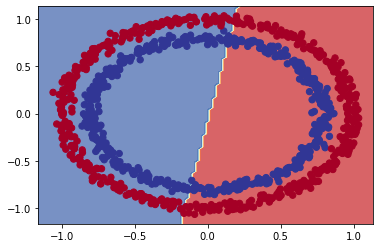

In [25]:
# Check predictions model is making
plot_decision_boundary(model_3,
                       x,
                       y)

In [26]:
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [27]:
# Determine if model can be used for a regression problem

tf.random.set_seed(42)

# Create Regression Data
x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

x_regression[:10], y_regression[:10]

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145], dtype=int32)>)

In [28]:
x_regression.shape, y_regression.shape

(TensorShape([200]), TensorShape([200]))

In [29]:
#Split Training Data into Training and Test Set
x_regression_train = x_regression[:150]
x_regression_test = x_regression[150:]

y_regression_train = x_regression[:150]
y_regression_test = x_regression[150:]

# Fit Model to the regression data

x_regression_train = tf.expand_dims(x_regression_train, axis=-1)
x_regression_test = tf.expand_dims(x_regression_test, axis=-1)

In [30]:
x_regression_train[:10]

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[ 0],
       [ 5],
       [10],
       [15],
       [20],
       [25],
       [30],
       [35],
       [40],
       [45]], dtype=int32)>

In [31]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)
model_4.fit(x_regression_train, y_regression_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 457.7376 - mae: 457.7376
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 386.4662 - mae: 386.4662
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 319.2714 - mae: 319.2714
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 250.0741 - mae: 250.0741
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 177.2976 - mae: 177.2976
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 96.6778 - mae: 96.6778
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 21.2541 - mae: 21.2541
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 37.5219 - mae: 37.5219
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 24.7236 - mae: 24.7236
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 9.5909 - mae: 9.5909
Epoch 11/100
5/5 [==============================] -

In [32]:
# Make Predictions with our trained model
y_pred = model_4.predict(x_regression_test)
y_pred[:10]

2/2 [==============================] - 0s 4ms/step


array([[755.46204],
       [760.4981 ],
       [765.5347 ],
       [770.5711 ],
       [775.6077 ],
       [780.644  ],
       [785.6804 ],
       [790.71674],
       [795.7533 ],
       [800.78973]], dtype=float32)

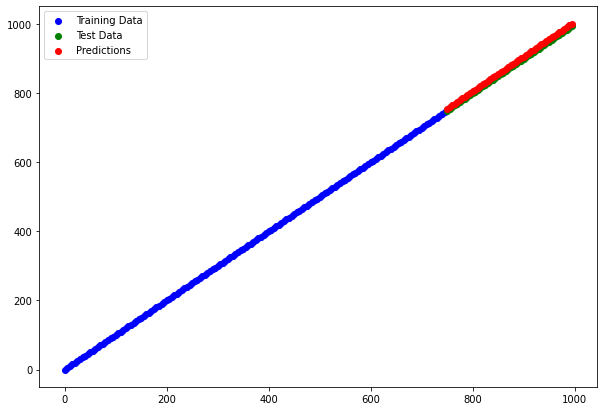

In [33]:
# Plot the Model Predictions with regression data
plt.figure(figsize=(10,7))
plt.scatter(x_regression_train, y_regression_train, c="b", label="Training Data")
plt.scatter(x_regression_test, y_regression_test, c="g", label="Test Data")
plt.scatter(x_regression_test, y_pred, c="r", label="Predictions")
plt.legend();

#Non Linearity

In [34]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
history = model_5.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.3636 - accuracy: 0.4900
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3616 - accuracy: 0.4900
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3603 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3423 - accuracy: 0.4900
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3284 - accuracy: 0.4910
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3274 - accuracy: 0.4910
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3263 - accuracy: 0.4910
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3262 - accuracy: 0.4910
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3252 - accuracy: 0.4910
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3242 - accuracy: 0.4910
Epoch 11/

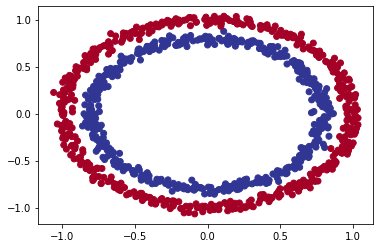

In [35]:
# Check Data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
Binary Classification


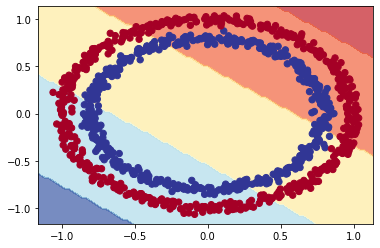

In [36]:
# Plot Decision Boundary for latest model
plot_decision_boundary(model_5,
                       x,
                       y)

In [37]:
# Build Model with Non Linear Activation Function

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])
model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
model_6.fit(x,y,epochs=850)

Epoch 1/850
32/32 [==============================] - 1s 2ms/step - loss: 1.2393 - accuracy: 0.5000
Epoch 2/850
32/32 [==============================] - 0s 2ms/step - loss: 1.0101 - accuracy: 0.4360
Epoch 3/850
32/32 [==============================] - 0s 2ms/step - loss: 0.9220 - accuracy: 0.3620
Epoch 4/850
32/32 [==============================] - 0s 2ms/step - loss: 0.8695 - accuracy: 0.3790
Epoch 5/850
32/32 [==============================] - 0s 2ms/step - loss: 0.8353 - accuracy: 0.3480
Epoch 6/850
32/32 [==============================] - 0s 2ms/step - loss: 0.8106 - accuracy: 0.3100
Epoch 7/850
32/32 [==============================] - 0s 2ms/step - loss: 0.7923 - accuracy: 0.3400
Epoch 8/850
32/32 [==============================] - 0s 2ms/step - loss: 0.7779 - accuracy: 0.3210
Epoch 9/850
32/32 [==============================] - 0s 2ms/step - loss: 0.7654 - accuracy: 0.3320
Epoch 10/850
32/32 [==============================] - 0s 2ms/step - loss: 0.7552 - accuracy: 0.3790
Epoch 11/

In [38]:
y_pred_2 = model_6.predict(x)

32/32 [==============================] - 0s 1ms/step


313/313 [==============================] - 0s 1ms/step
Binary Classification


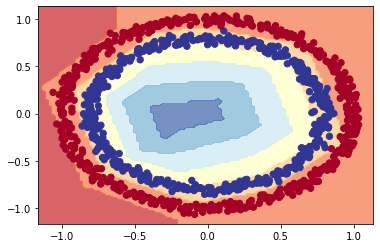

In [39]:
plot_decision_boundary(model_6,
                       x,
                       y)

In [40]:
# Set Random Seed for Reproducibility
tf.random.set_seed(42)

# 1. Create Model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])
# 2. Compile Model
model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
# 3. Fit Model
model_7.fit(x,y,epochs=1000)

Epoch 1/1000
32/32 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5010
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5560
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5080
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5200
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5210
Epoch 6/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5190
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5300
Epoch 8/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5230
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5300
Epoch 10/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5320

313/313 [==============================] - 0s 1ms/step
Binary Classification


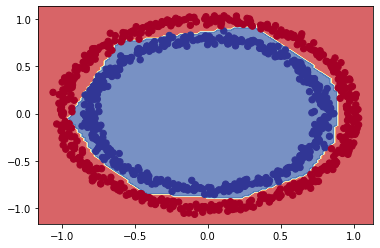

In [41]:
plot_decision_boundary(model_7,
                       x,
                       y)

In [42]:
# Create a test tensor
test = tf.cast(tf.range(-10, 10), tf.float32)

In [43]:
test

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

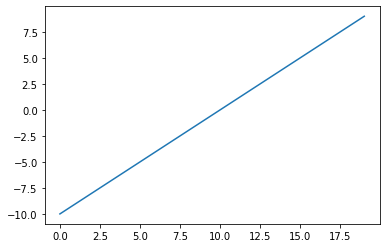

In [44]:
#Visualize test tensor
plt.plot(test);

In [45]:
sigmoid_test = tf.keras.activations.sigmoid(test)

In [46]:
sigmoid_test

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105123e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425877e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079709e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752736e-01, 9.9908894e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

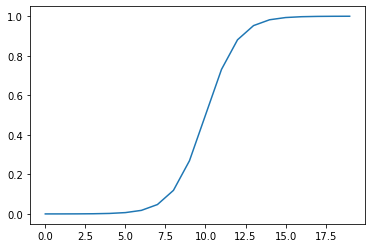

In [47]:
plt.plot(sigmoid_test);

In [48]:
def sigmoid_function(x):
  return 1/(1 + tf.exp(-x))

In [49]:
sigmoid_function_test = sigmoid_function(test)

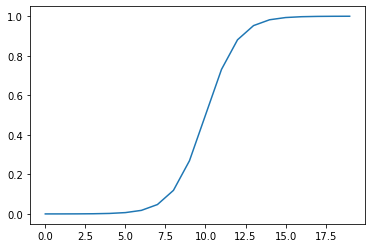

In [50]:
plt.plot(sigmoid_function_test);

In [51]:
def relu_function(x):
  return tf.maximum(0, x)

In [52]:
relu_function_test = relu_function(test)
relu_function_test

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

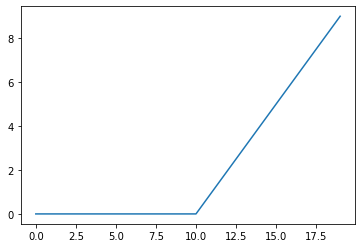

In [53]:
plt.plot(relu_function_test);

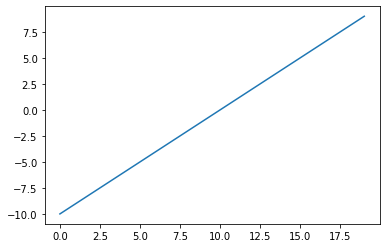

In [54]:
plt.plot(test);

In [55]:
linear_function_test = tf.keras.activations.linear(test)
linear_function_test

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

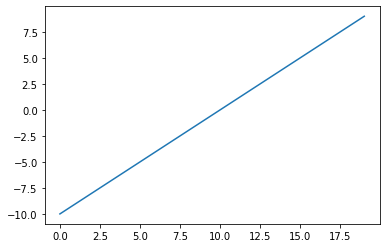

In [56]:
plt.plot(linear_function_test);

#Evaluating and improving our classifications
Create a Training and Test Set

In [57]:
#Check how many examples in the dataset
len(x)

1000

In [58]:
# Split into train and test sets
x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [59]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)
history = model_8.fit(x_train,y_train,epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5038
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.6325
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.6313
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.7475
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.6963
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.7887
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5385 - accuracy: 0.8763
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.8975
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4194 - accuracy: 0.9550
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3430 - accuracy: 0.9812
Epoch 11/50
25/25 [

313/313 [==============================] - 0s 1ms/step
Binary Classification


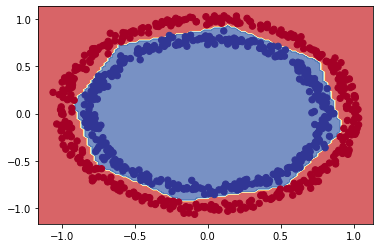

In [60]:
plot_decision_boundary(model_8,x_train,y_train)

In [61]:
model_8.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 1.0000


[0.015102572739124298, 1.0]

313/313 [==============================] - 0s 1ms/step
Binary Classification
313/313 [==============================] - 0s 1ms/step
Binary Classification


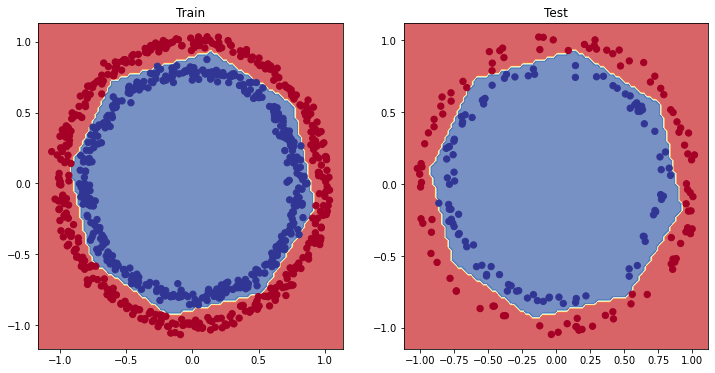

In [62]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, x_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, x_test, y_test)

In [63]:
history.history

{'loss': [0.6911593079566956,
  0.676770806312561,
  0.6639273166656494,
  0.6451881527900696,
  0.620614767074585,
  0.5839349627494812,
  0.5385372638702393,
  0.488850474357605,
  0.4194258749485016,
  0.3430369198322296,
  0.25986260175704956,
  0.20699219405651093,
  0.1692783385515213,
  0.14215025305747986,
  0.11654364317655563,
  0.1023927852511406,
  0.08739736676216125,
  0.07893627882003784,
  0.068942591547966,
  0.06823618710041046,
  0.05990849435329437,
  0.05663197860121727,
  0.050160814076662064,
  0.048738908022642136,
  0.04393746703863144,
  0.04245561733841896,
  0.04034707695245743,
  0.035414308309555054,
  0.03632284700870514,
  0.03670893609523773,
  0.03480214625597,
  0.034268755465745926,
  0.03250123932957649,
  0.027035458013415337,
  0.028373563662171364,
  0.027147410437464714,
  0.026964273303747177,
  0.025673119351267815,
  0.026852093636989594,
  0.0223383828997612,
  0.023287808522582054,
  0.024475498124957085,
  0.01991192065179348,
  0.02182873

In [64]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.691159,0.50375
1,0.676771,0.63250
2,0.663927,0.63125
3,0.645188,0.74750
4,0.620615,0.69625
5,0.583935,0.78875
6,0.538537,0.87625
7,0.488850,0.89750
8,0.419426,0.95500
9,0.343037,0.98125


Text(0.5, 1.0, 'Model_8 Loss Curves')

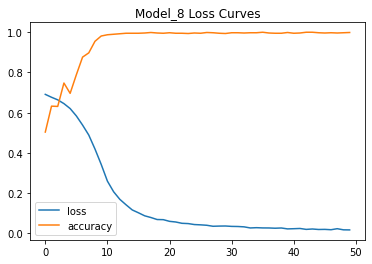

In [65]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 Loss Curves")

## Finding the best learning rate

Find the ideal learning rate. Learning Rate callback, functionality that you can add to your model while it's training.

Build an additional model

Modified Loss Curve Plot

In [66]:
#Set Random Seed
tf.random.set_seed(42)

#Create Model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),

])
model_9.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
#Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_9.fit(x_train, y_train, epochs=100, callbacks=lr_scheduler)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6963 - accuracy: 0.5088 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5075 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.5075 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5025 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5050 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.5063 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5088 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

In [67]:
history.history

{'loss': [0.6963174939155579,
  0.6961644887924194,
  0.6960193514823914,
  0.6958426833152771,
  0.6956825256347656,
  0.6955319046974182,
  0.6952906847000122,
  0.6951146721839905,
  0.6949187517166138,
  0.6946704983711243,
  0.6944667100906372,
  0.6942317485809326,
  0.693905234336853,
  0.6935787200927734,
  0.6933084726333618,
  0.6928470730781555,
  0.6925522685050964,
  0.6920541524887085,
  0.6916735172271729,
  0.6911402940750122,
  0.6905019283294678,
  0.6897526383399963,
  0.6888375282287598,
  0.6876160502433777,
  0.6862191557884216,
  0.684683084487915,
  0.6831352710723877,
  0.680370569229126,
  0.6783868670463562,
  0.6742551326751709,
  0.6708055734634399,
  0.6637726426124573,
  0.6538867354393005,
  0.6371991634368896,
  0.6109033823013306,
  0.5902154445648193,
  0.5431907773017883,
  0.4886866807937622,
  0.4429052770137787,
  0.3884105682373047,
  0.3382740914821625,
  0.27895617485046387,
  0.24505090713500977,
  0.22101886570453644,
  0.1942862719297409,
  

In [68]:
pd.DataFrame(history.history)

,loss,accuracy,lr
0,0.696317,0.50875,0.000100
1,0.696164,0.50750,0.000112
2,0.696019,0.50750,0.000126
3,0.695843,0.50250,0.000141
4,0.695683,0.50500,0.000158
...,...,...,...
95,0.775424,0.46375,5.623413
96,0.802573,0.50125,6.309574
97,0.958758,0.49625,7.079458
98,0.939441,0.49125,7.943282


<Axes: >

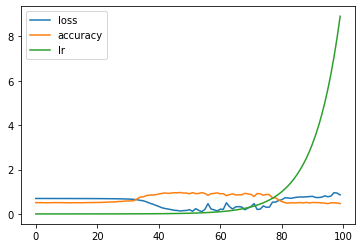

In [69]:
pd.DataFrame(history.history).plot()

In [70]:
# Plot learning rate compared to the loss -- 100 values of learning rate - learning rate scheduler
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

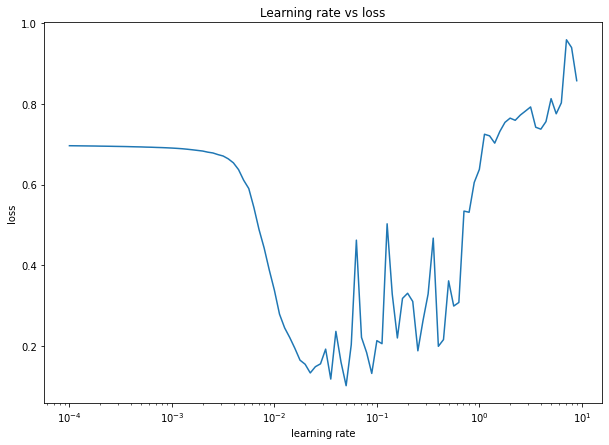

In [71]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Learning rate vs loss");

# 10^-2 = 0.01, 10^-1 = 0.1

In the graph above the optimal learning rate for the model above would fall between 10^-2 to 10^-1 which would follow a range between 0.01 - 0.1
0.01 - 0.1 

Optimal learning rate in the example provided above would be or fall in between 0.01 - 0.02

The ideal learning rate for the model above would be smaller that the lowest point on the curve. 

In [72]:
# Examples of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [73]:
# Examples of other typical learning rate values
1e-0, 1e-1, 1e-2, 10**-4

(1.0, 0.1, 0.01, 0.0001)

In [75]:
#Build a Model using the Train Datset and modify the learning rate to 0.02 to see if the model performance has changed
tf.random.set_seed(42)
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_10.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["accuracy"]
)

model_10.fit(x_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 3s 3ms/step - loss: 0.6889 - accuracy: 0.5537
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.6025
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6461 - accuracy: 0.6612
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5879 - accuracy: 0.7250
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5054 - accuracy: 0.7912
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3768 - accuracy: 0.9050
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2631 - accuracy: 0.9538
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1847 - accuracy: 0.9638
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.1301 - accuracy: 0.9862
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0943 - accuracy: 0.9900
Epoch 11/25
25/25 [

In [77]:
model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0246 - accuracy: 0.9900


[0.024602899327874184, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
Binary Classification
313/313 [==============================] - 1s 2ms/step
Binary Classification


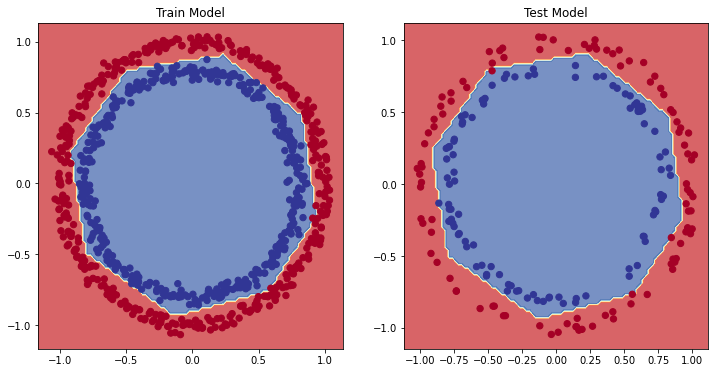

In [81]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train Model")
plot_decision_boundary(model_10, x_train, y_train)
plt.subplot(1,2,2)
plt.title("Test Model")
plot_decision_boundary(model_10, x_test, y_test);

# More Classification Evaluation Methods

Accuracy

Precision

Recall

F1 Score

Confusion Matrix

Specificity

Classification Report - SciKit Learn

In [90]:
# Check Accuracy of our Model
loss, accuracy = model_10.evaluate(x_test, y_test)
print(f"Model Loss: {loss}")
print(f"Model Accuracy: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 5ms/step - loss: 0.0246 - accuracy: 0.9900
Model Loss: 0.024602899327874184
Model Accuracy: 99.00%


#Confusion Matrix